In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# generate sample data for classsification
from sklearn.datasets import make_classification

data = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)
df = pd.DataFrame(data[0], columns=['feature1', 'feature2'])
df['target'] = data[1]
print(df.head())

   feature1  feature2  target
0 -0.999102 -0.663860       1
1  1.246686  1.153597       1
2  0.962777  0.859397       1
3 -2.957441  2.033645       1
4  1.141165  1.059449       1


In [4]:
X = df[['feature1', 'feature2']]
y = df['target']

print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)
print(model.coef_)
print(model.intercept_)

[[-0.29547236  2.14154285]]
[0.222254]


/home/rishikeshkumar/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


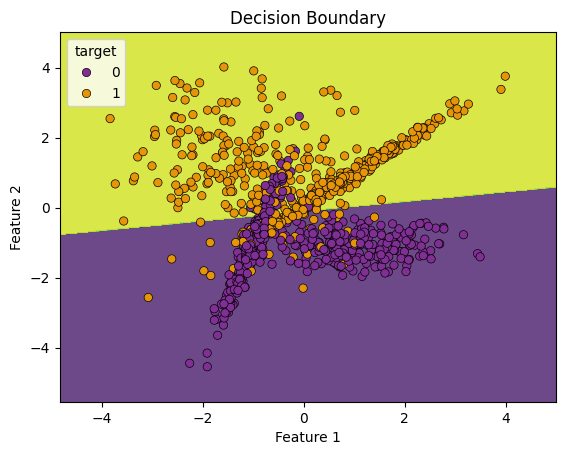

In [6]:
# plotting the decision boundary using seaborn
def plot_decision_boundary(model, X, y):
    x_min, x_max = X['feature1'].min() - 1, X['feature1'].max() + 1
    y_min, y_max = X['feature2'].min() - 1, X['feature2'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    sns.scatterplot(x=X['feature1'], y=X['feature2'], hue=y, palette='CMRmap', edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(model, X, y)